In [16]:
import numpy as np
from scipy.linalg import lu
A = np.array([[1,2,3],[2,5,10],[3,10,16]])
P,L,U = lu(A)
print('L=\n',L,'\nU=\n',U,'\nP=\n',P.T)

L=
 [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]] 
U=
 [[ 3.         10.         16.        ]
 [ 0.         -1.66666667 -0.66666667]
 [ 0.          0.         -1.8       ]] 
P=
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


# Question 2

In [17]:
import numpy as np
import pandas as pd

In [18]:
A = np.array([
    [0,6, -2, 0, 0, 0],
    [0,4, 1, 2, 2, 0],
    [0, 0, 0, 0, 2, 4],
    [1, -1, 0, 1, 0, 0],
    [0, 0, 1, 0, -1, 1],
    [0, 0, 0, 1, -1, 1]
])

In [19]:
A

array([[ 0,  6, -2,  0,  0,  0],
       [ 0,  4,  1,  2,  2,  0],
       [ 0,  0,  0,  0,  2,  4],
       [ 1, -1,  0,  1,  0,  0],
       [ 0,  0,  1,  0, -1,  1],
       [ 0,  0,  0,  1, -1,  1]])

In [20]:
A_condition_number = np.linalg.cond(A)
A_condition_number

12.282549213832523

# Question 3 a

In [21]:
import numpy  as np
import time

In [2]:
file_path = 'network.csv'
network_matrix = np.loadtxt(file_path,delimiter=',')

cpu_times = []
a_sum_cpu_times = 0
x_sum = []

# Solving the system Ax=b for different input pressures i=1,...,20
for i in range(1, 21):
    # Construct the right-hand side b with i at positions 1, 4600, and 4666 (0-indexed)
    b = np.zeros(network_matrix.shape[0])
    b[[0, 4599, 4665]] = i  # Adjusting for 0-indexing in Python
    start_time = time.process_time()
    x = np.linalg.solve(network_matrix, b)
    #x_sum.append(x)
    end_time = time.process_time()
    #print("\n",x)
    a_sum_cpu_times += end_time - start_time
    cpu_times.append(end_time - start_time)

#cpu_times
print("Method A cpu time = \n",a_sum_cpu_times)


Method A cpu time = 
 118.06808099999998


# Question 3 b

In [8]:
import numpy as np
import scipy.linalg as la
import time


# Start timing the LU factorization
start_lu_fact_time = time.process_time()
lu, piv = la.lu_factor(network_matrix)
end_lu_fact_time = time.process_time()

# Total time for LU factorization
lu_fact_time = end_lu_fact_time - start_lu_fact_time

#lu_cpu_times = []
lu_solve_time = 0
# Solving the system Ax=b for different input pressures i=1,...,20 using LU decomposition
for i in range(1, 21):
    # Construct the right-hand side b with i at positions 1, 4600, and 4666 (0-indexed)
    b = np.zeros(network_matrix.shape[0])
    b[[0, 4599, 4665]] = i  # Adjusting for 0-indexing in Python

    
    start_lu_time = time.process_time()
    x_lu = la.lu_solve((lu, piv), b)
    end_lu_time = time.process_time()
    
    
    lu_solve_time += end_lu_time - start_lu_time
    #lu_cpu_times.append(solve_time)

Lu_total_time = lu_fact_time + lu_solve_time
print("Method B = \n" ,Lu_total_time)

Method B = 
 5.748755000000017


# Quesiton 3 c

In [24]:
B = np.zeros((network_matrix.shape[0], 20))
# Populate B such that B[:,i] has the input pressures i+1 at the positions 1, 4600, and 4666
for i in range(20):
    B[0, i] = B[4599, i] = B[4665, i] = i + 1
start_no_loop_time = time.process_time()
# Solve the systems AX = B without a loop
X = np.linalg.solve(network_matrix, B)
end_no_loop_time = time.process_time()
#print(X.T)
c_no_loop_cpu_time = end_no_loop_time - start_no_loop_time
print("Method C = \n",c_no_loop_cpu_time)

Method C = 
 5.422713999999985


# Question 3 d

In [25]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

# Convert the connectivity matrix and B matrix to sparse format
A_sparse = csc_matrix(network_matrix)
B_sparse = csc_matrix(B)


start_sparse_time = time.process_time()

# Solve the systems AX = B using sparse solver
X_sparse = spsolve(A_sparse, B_sparse)


end_sparse_time = time.process_time()
#print(X_sparse)

sparse_cpu_time = end_sparse_time - start_sparse_time
sparse_cpu_time
print("Method D = \n",sparse_cpu_time)

Method D = 
 0.2013949999999909


Text(0, 0.5, 'Row Index')

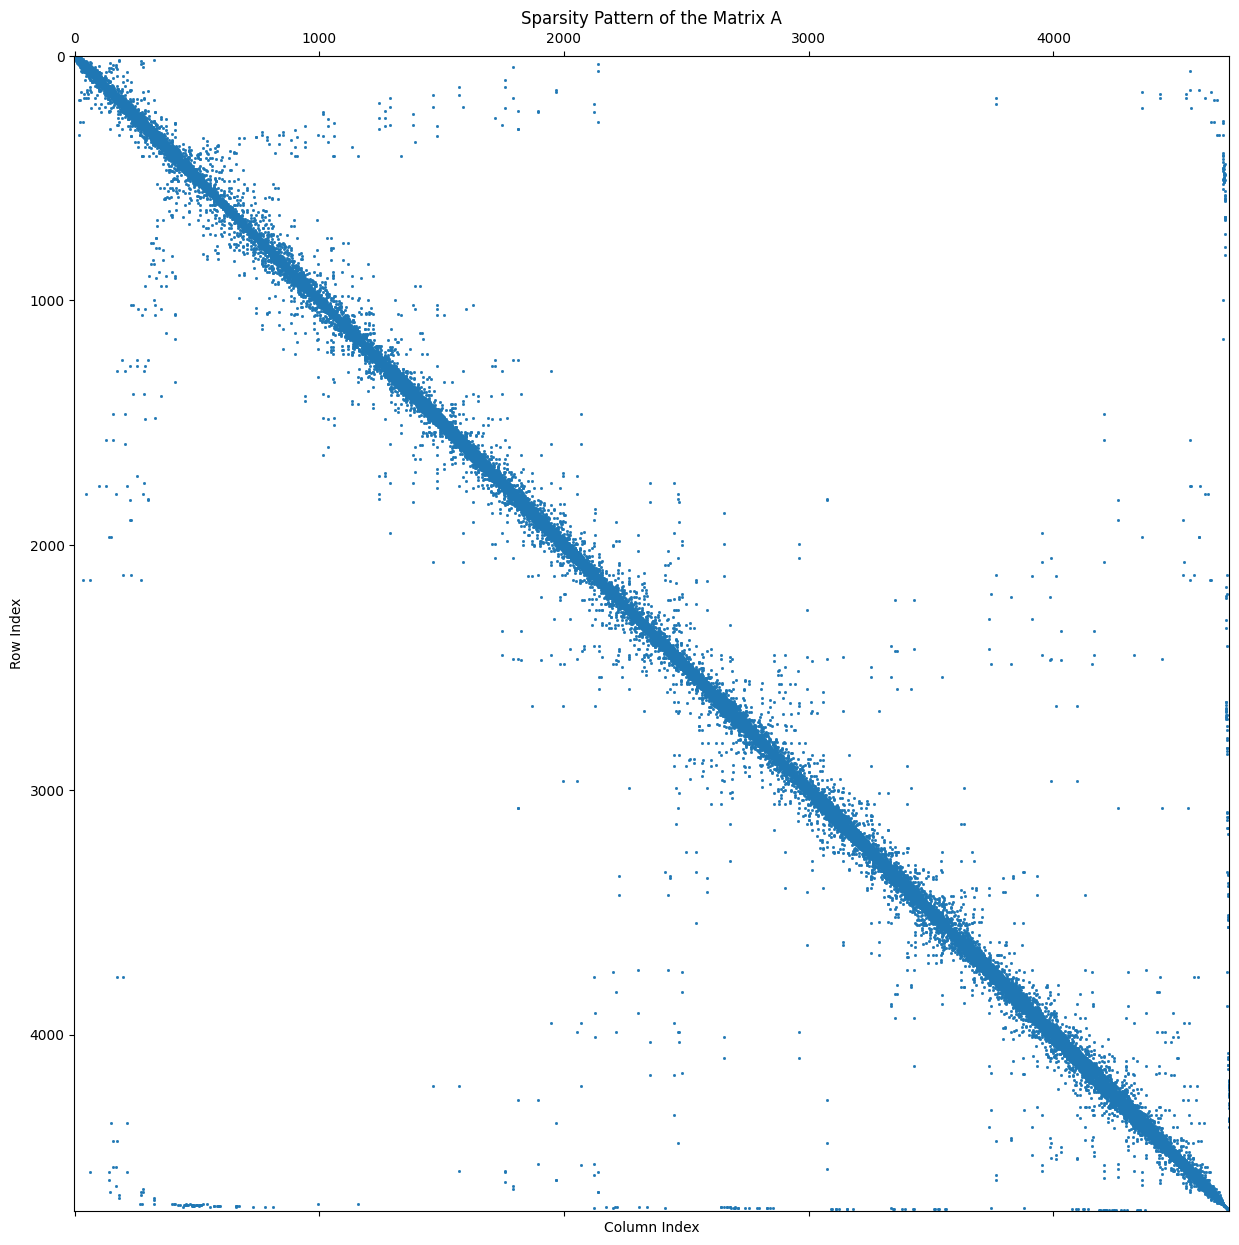

In [26]:
import matplotlib.pyplot as plt

# Use 'spy' to plot the sparsity pattern of the matrix A
plt.figure(figsize=(15, 15))
plt.spy(A_sparse, markersize=1)
plt.title('Sparsity Pattern of the Matrix A')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

In [27]:
print("\n",B[0])
print("\n",B[4599])
print("\n",B[4665])
print("\n",B[1])


 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]

 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]

 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Question 5

In [28]:
from scipy.sparse import csr_matrix
import numpy as np

example_matrix = np.array([
    [1, 0, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 3],
    [4, 0, 0, 0]
])


sparse_matrix = csr_matrix(example_matrix)

print(sparse_matrix)


  (0, 0)	1
  (1, 2)	2
  (2, 3)	3
  (3, 0)	4
